# Scoring Demonstration

This Google Colab notebook demonstrates core concepts in scoring. Specifically for our purposes, we will mostly cover sample-based norms (i.e., norm-referenced scoring). This builds on our week 6 demonstration so that we can build upon our knowledge from before.

We will use the `tidyverse` and `psych` packages to illustrate the EFA and scoring approaches.

## Required Packages

- `tidyverse`: for data handling and visualization  
- `psych`: for factor analysis functions (e.g., `fa`, `fa.parallel`)  


In [1]:
## Install the psych package
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [2]:
## Load both packages
library(tidyverse)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




## Load the data

In this section, you'll load the simulated dataset containing item-level responses. Each row represents one participant. Each column is a survey item, scored on a **1 to 7 Likert scale**.

In [3]:
## Load data
## Set the URL to Casey's GitHub page where the dataset is located
FileURL <- "https://raw.githubusercontent.com/CaseyGio/Psyc6263/refs/heads/main/Datasets/EFA%20Demonstration%20Data.csv"

## Read the csv file from GitHub and create a new object
EFAData <- read_csv(url(FileURL)) %>% select(starts_with("Item"))

## Check out the dataset
head(EFAData, n = 10)

Rows: 100 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, Item9, Item10

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4,5,5,7,2,5,2,2,1
3,6,4,1,2,2,1,1,3,1
5,6,7,7,6,2,7,6,7,6
5,5,4,5,4,4,4,2,3,2
5,5,5,1,4,3,7,4,2,2
1,6,4,4,2,1,1,2,7,3
3,2,1,2,7,7,4,3,5,2
6,4,6,4,3,7,3,3,2,5
6,4,7,6,7,2,7,7,7,3


## Refresher: EFA findings

For simplicity, we'll show the parallel analysis results and EFA results so that we remember our latent factor structures in our dataset.

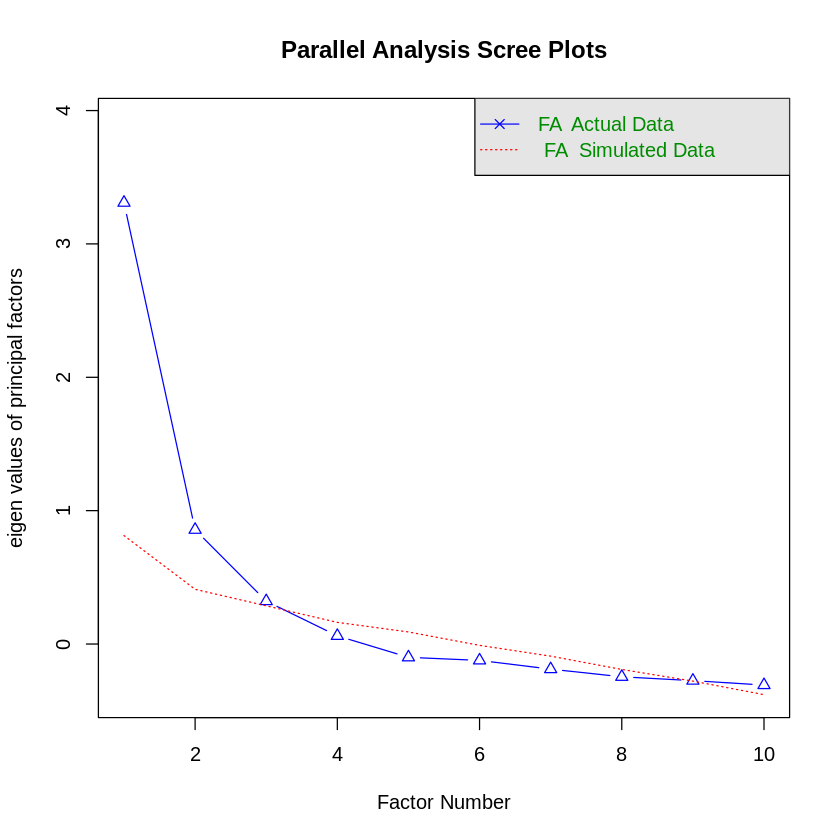

In [8]:
## Create correlation matrix
CorrData <-
  cor(EFAData)

## Parallel analysis
fa.parallel(x     = CorrData,
            fa    = "fa",
            n.obs = 100)

In [ ]:
## Extract and rotate our factor solutions
EFAOutput <-
  fa(r        = CorrData,
     nfactors = 2,
     rotate   = "oblimin",
     fm       = "ols")

## Show the factor loadings (factor pattern) matrix
EFAOutput$loadings[] %>%
  round(2)


Item1,0.64,0.12
Item2,0.75,-0.06
Item3,0.85,-0.11
Item4,0.59,0.26
Item5,0.47,0.33
Item6,-0.02,0.27
Item7,-0.03,0.71
Item8,-0.02,0.78
Item9,0.05,0.71
Item10,0.19,0.24


In [ ]:
## Show the factor correlation (Phi) matrix
EFAOutput$Phi %>%
  round(2)

1.00,0.42
0.42,1.00


### Interpretation

**Factor pattern matrix**: We have some decent items here as far as they relate to the latent factors. However, there are some less-than-ideal ones, too.

Items 5, 6, and 10 have some issues that stand out.

Item 5 has (a) a low loading on the primary factor (loading = .47) but is mostly problematic because (b) it has a cross-loading on the secondary factor (loading = .33). The item is not a clear indicator of either factor and is somehow (at least partially) related to both factors, which is not ideal.

Items 6 and 10 both have low loadings on the primary factors (loadings = .27 and .24, respectively). The "primary factor" is merely the factor with the highest loading.

We might want to revise those items or even remove them from our scale. They have "good" descriptive statistics and do not negatively affect our reliability but they have lower construct validity in that they are not good representations of the focal constructs they were intended to measure.

**Factor correlation matrix**: This is easy, we have a decently large factor correlation ($\Phi$ = .42). This suggests we were correct in adopting an oblique rotation. Had this value been very low in absolute value (i.e., near zero), we may want to consider using an orthogonal rotation like Varimax.

## Creating the subscale scores

We have the following subscales in our dataset:

**Scale 1**:

* Item1
* Item2
* Item3
* Item4

**Scale 2**:

* Item7
* Item8
* Item9

## Unit-weighted scores

For simplicity and due to our small sample size, we can create sub-scale scores by equally-weighting each item within a sub-scale. We could create a weighted score (e.g., using factor loadings as weights) as well but we discuss some issues with that in lecture.

The code below seems complicated but we are essentially designating the columns that we are including in our calculation of the average. In case we had missing data, we use `na.rm = TRUE` to remove (rm) the NA (na) values.

In [15]:
## Create subscale scores
Scoring <-
  EFAData %>%
  rowwise() %>%
  mutate(Scale1 = mean(c_across(all_of(c("Item1", "Item2", "Item3", "Item4"))), na.rm = TRUE),
         Scale2 = mean(c_across(all_of(c("Item7", "Item8", "Item9"))), na.rm = TRUE)) %>%
  ungroup()

## Examine the subscale scores
Scoring %>%
  #select(Scale1, Scale2) %>%
  head(n = 10)

Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10,Scale1,Scale2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4,5,5,7,2,5,2,2,1,5.00,3.000000
3,6,4,1,2,2,1,1,3,1,3.50,1.666667
5,6,7,7,6,2,7,6,7,6,6.25,6.666667
5,5,4,5,4,4,4,2,3,2,4.75,3.000000
5,5,5,1,4,3,7,4,2,2,4.00,4.333333
1,6,4,4,2,1,1,2,7,3,3.75,3.333333
3,2,1,2,7,7,4,3,5,2,2.00,4.000000
6,4,6,4,3,7,3,3,2,5,5.00,2.666667
6,4,7,6,7,2,7,7,7,3,5.75,7.000000


## Raw scores to percentiles

Percentile scores are a norm-referenced scoring approach. Based on the distribution of scores in a sample, we can identify how individual scores compare to the rest of the sample. We can even use these to represent benchmarks for future scores, assuming our sample is generalizable to the newly collected data that is (an often-violated assumption).

The `quantile()` function helps us identify some benchmarks.

In [25]:
## Percentiel benchmarks for Scale1
Scoring$Scale1 %>% ## Select Scale1 column
  quantile(probs = seq(from = .1, to = .9, by = .1)) %>% ## Find percentiles
  round(2) %>%
  as.data.frame() ## Put into table

,.
,<dbl>
10%,1.73
20%,2.45
30%,2.75
40%,3.50
50%,4.12
60%,4.75
70%,5.00
80%,5.50
90%,6.03


In [24]:
## Percentiel benchmarks for Scale2
Scoring$Scale2 %>% ## Select Scale2 column
  quantile(probs = seq(from = .1, to = .9, by = .1)) %>% ## Find percentiles
  round(2) %>%
  as.data.frame() ## Put into table

,.
,<dbl>
10%,1.67
20%,2.33
30%,3.00
40%,3.33
50%,4.00
60%,4.67
70%,5.00
80%,5.67
90%,6.33


## Interpretation

We have created our norm-referenced scoring system. First, we created a subscale score based on the items best representing each latent factor. Then, we identified the raw scores associated with certain percentiles. For example, in Scale1, receiving a score of 1.73 means that this score is higher than 10% of the norming sample. Assuming we have a generalizable norm, it would be extended to claim that the score of 1.73 is greater than 10% of respondents.

Notice the non-equal intervals between percentiles. In Scale1, the difference between the 60th and 70th percentiles is 0.25 but the difference between the 70th and 80th percentiles is 0.50, double the difference! These percentile scores do not have an inherent interpretation, we must interpret each percentile score *in reference to the sample we created these norms in*.